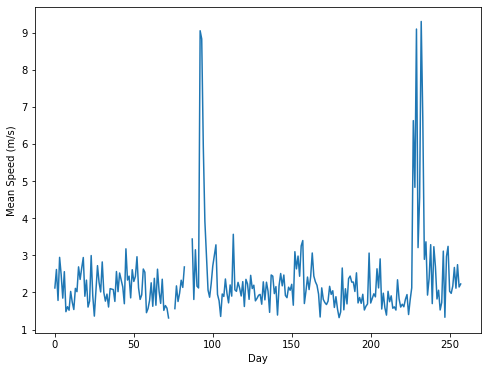

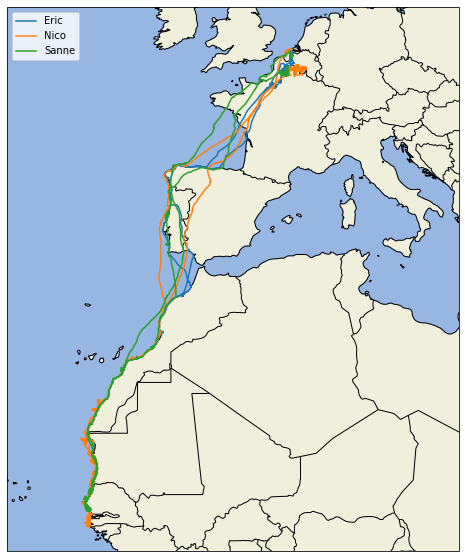

In [8]:
#GPS stuff
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
import datetime
import cartopy.crs as ccrs, cartopy.feature as cfeature



birddata = pd.read_csv("bird_tracking.csv")

ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]


timestamps=[]
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                     (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
    



birddata["timestamp"] = pd.Series(timestamps, index= birddata.index)

data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time  =[time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean Speed (m/s)")


## CREATING A MAP OF MOTION FOR ALL BIRDS ##

proj = ccrs.Mercator()

## setting up plot
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

## adding land and boarders to plot
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')


##looping through and plotting
for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,'-', transform=ccrs.Geodetic(), label=name)
    
plt.legend(loc= "upper left")
plt.savefig('map.pdf')